#            Vehicle Silhouettes

### Domain : Object Recognition
### Purpose of this project is to classify a given silhouette as one of  the 3 types of vehicle -bus,car,van - using a set of features extracted from the dataset.

##### There 18 features(numerical) for this dataset and the class variable(categorical).
##### All the features are geometric features extracted from the silhouette <br>

compactness : value ranges from 73 to 119 . doesnt seem to have any outliers.<br><br>
circularity	: value are from 33 to 59 contiously and few values are blanks. it seems like no outliers.<br><br>
distance_circularity : value ranges from 40 to 112 almost contiously and few values are blanks. doesnt seem to have any outliers<br><br>
radius_ratio : value ranges from 104 to 333 and few values are blanks.possiblity of outliers(only one observation each for high values)<br><br>
pr.axis_aspect_ratio : value are from 47 to 76 continously and other values are 97,102,103,105,126,133 and 138. Few values are blanks<br><br>
max.length_aspect_ratio	: we have values from 2 to 13 continously and other values are 19,22,25,43,46,48,49,52,55. Possiblies of outliers (high range values), high values have very less observations.<br><br>
scatter_ratio : value ranges from 112 to 265 and few values are blanks.
<br><br>
elongatedness : values are from 26 to 61 continously  and few values are blanks.<br><br>
pr.axis_rectangularity : value are from 17 to 29 continously and few values are blanks.<br><br>
max.length_rectangularity : value ranges are from 118 to 180 continously and other values are 182,186 and 188.<br><br>
scaled_variance: value ranges from 130 to  288 almost continously and after that next vlaues is 320(only one observation with this value ,possibly an outlier) and few values are blanks.<br><br>
scaled_variance.1 :value ranges from 184 to 1018 and few values are blanks.very high range,possiblity of outliers.<br><br>
scaled_radius_of_gyration: value ranges from 109 to 268 and few blanks.<br> <br>	
scaled_radius_of_gyration.1: value are from 59 to 91 continously and other values are 97,99,118,119,127 and 135(only one observations each are there for these high values). values are widely spread. possiblity of outliers.  Few values are blanks.<br><br>
skewness_about: values are 0 from 22 contiously and few blanks<br><br>
skewness_about.1: values are 0 from 41 contiously and few blanks<br><br>
skewness_about.2: values are from 176 to 204 contiously	and 206. Few values are blanks.<br><br>
hollows_ratio: value are from 181 to 211 contionusly.
<br><br>
##### Target variable (categorical)<br>
class : values are 'car','van' and 'bus'



### Import the necessary liabraries

In [1]:
import pandas as pd
import numpy as np

# for visualiazation tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for statistical functions
from scipy import stats

#for splitting the data for training and testing
from sklearn.model_selection import train_test_split

# for data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for performing model analysis and evaluations
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

### Read the dataset into a dataframe

In [2]:
vehicle_df = pd.read_csv("C:/Users/jinju/Python/data/vehicle-2.csv")

## Exploratory Data Analysis

In [3]:
#shape of the dataframe
vehicle_df.shape

(846, 19)

In [4]:
#checking head of the data
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [5]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

For the 'scatter_ratio' mean(168.9) is higher than the median (157), it has got the SD = 33.2 and 75% of the observations are have the value 198 or less but the max value is 265.<br>
For the 'scaled_variance' mean(188.6) is higher than medain(179), with the SD of 31.4. 75% of observations are under the value 217 but the max is 320.
For the 'scaled_variance.1' mean(439.5) is higher than medain(363.5), with the SD of 176.67. 75% of observations are under the value 587 but the max is 1018. it means that this feature is wide spread across the dataset.
for the rest of the features mean and median values are almost same.

In [6]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### Analyzing the categories and their count on the given dataset

In [7]:
pd.value_counts(vehicle_df['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

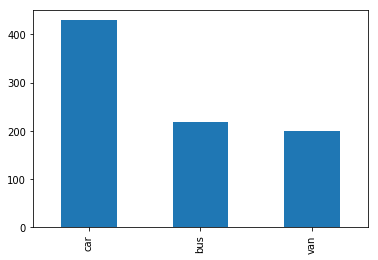

In [8]:
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

We have three target class variablescar,bus and van. Among these more data points are classified as 'car'.

### Multivariate analysis - pairplot 

C:\Users\jinju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jinju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jinju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jinju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1800x1800 with 0 Axes>

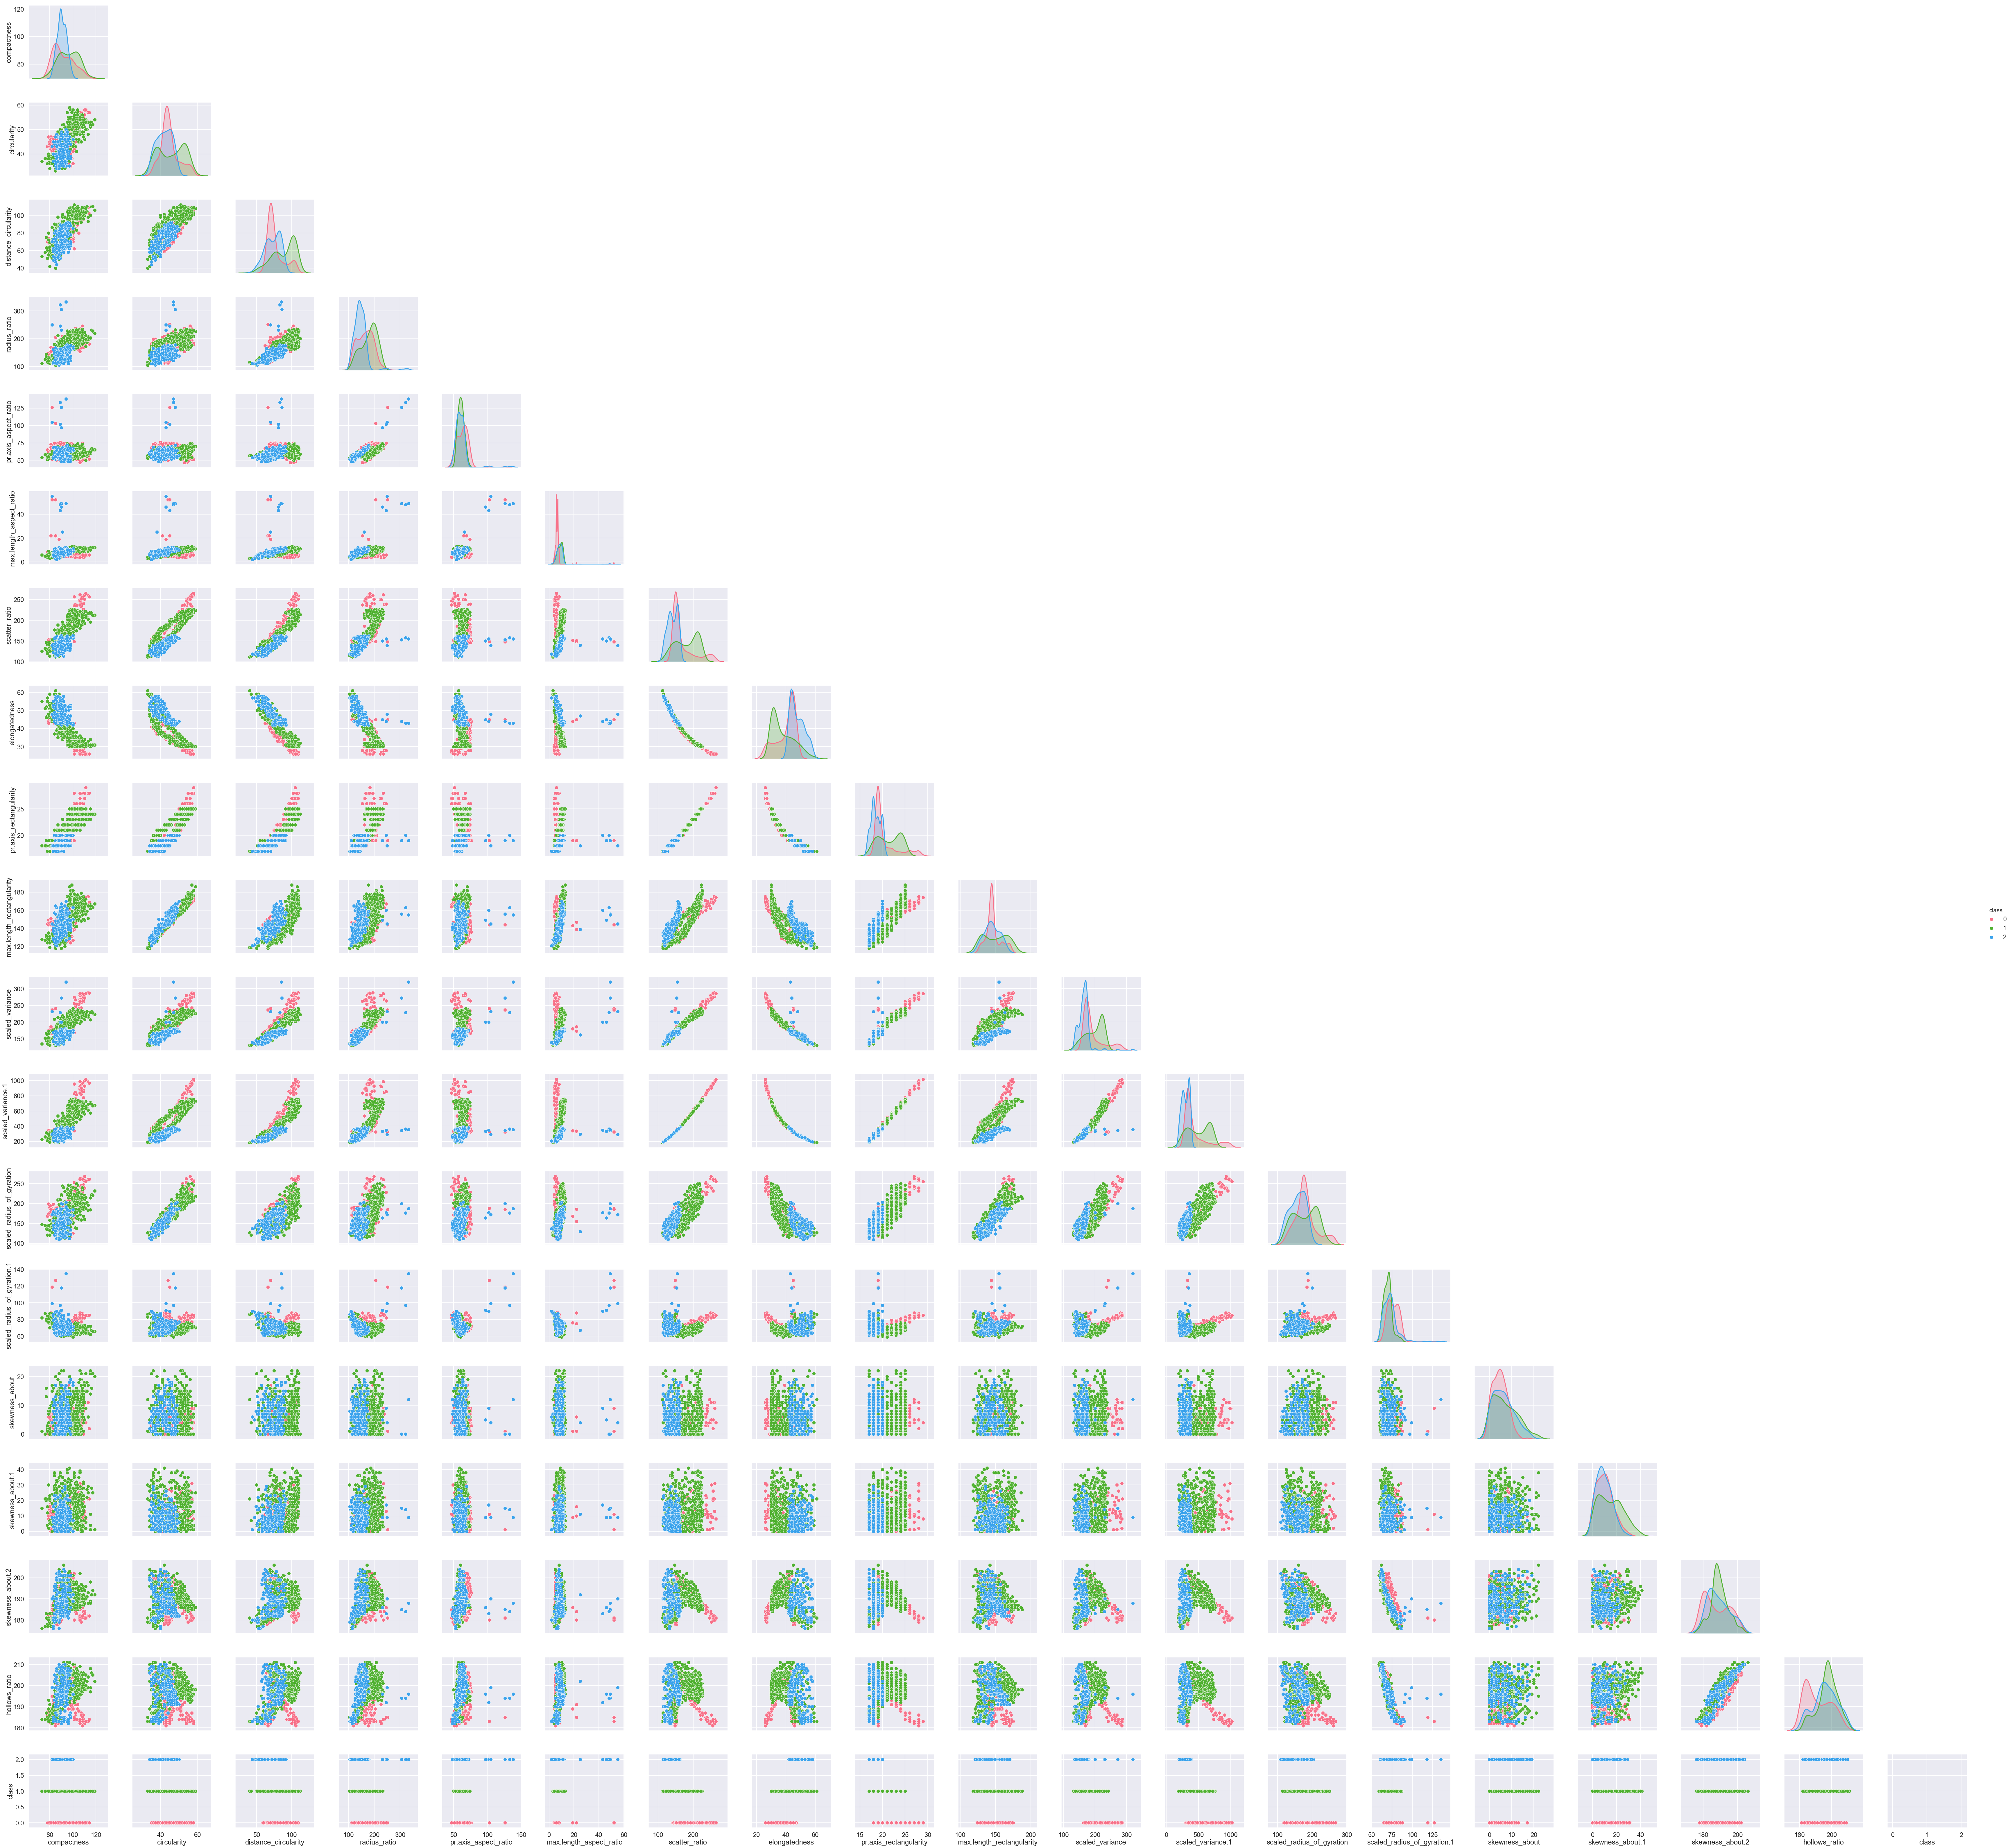

In [85]:
sns.set(style="darkgrid")
sns.set_context("poster", font_scale=1)

plt.figure(figsize=(25, 25))

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
  
g=sns.pairplot(vehicle_df,hue='class',palette='husl',diag_kind="kde",height=5)
g.map_upper(hide_current_axis)
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
#fig.set_tight_layout(True)

while looking at the diagonals, we can see that the distribution of any of the features doesnt look normal for any of the class category, it has got many peaks and valleys.

By analyzing the scatter plots between the attributes, we can see that: <br>
There is positivie correlation between the features 
- compactness and circularity
- compactness and distance_circularity
- circularity and distance_circularity 
- radius_ratio and compactness 
- radius_ratio and circularity
- radius_ratio and distance_circularity 
- scatter_ratio and compactness 
- scatter_ratio and circularity
- scatter_ratio and distance_circularity 
- pr.axis_rectangularity and compactness 
- pr.axis_rectangularity and circularity
- pr.axis_rectangularity and distance_circularity
- pr.axis_rectangularity and scatter_ratio 
- max.length_rectangularity and compactness 
- max.length_rectangularity and circularity
- max.length_rectangularity and distance_circularity
- max.length_rectangularity and radius_ratio
- max.length_rectangularity and scatter_ratio 
- max.length_rectangularity and pr.axis_rectangularity
- scaled_variance and compactness 
- scaled_variance and circularity
- scaled_variance and distance_circularity
- scaled_variance and scatter_ratio 
- scaled_variance and pr.axis_rectangularity
- scaled_variance and max.length_rectangularity
- scaled_variance.1 and compactness 
- scaled_variance.1 and circularity
- scaled_variance.1 and distance_circularity
- scaled_variance.1 and scatter_ratio 
- scaled_variance.1 and pr.axis_rectangularity
- scaled_variance.1 and max.length_rectangularity
- scaled_variance.1 and scaled_variance
- scaled_radius_of_gyration and compactness 
- scaled_radius_of_gyration and circularity
- scaled_radius_of_gyration and distance_circularity
- scaled_radius_of_gyration and radius_ratio
- scaled_radius_of_gyration and scatter_ratio 
- scaled_radius_of_gyration and pr.axis_rectangularity
- scaled_radius_of_gyration and max.length_rectangularity
- scaled_radius_of_gyration and scaled_variance
- scaled_radius_of_gyration and scaled_variance.1
- hollows_ratio and skewness_about.2


There is negative correlation between the features :
- elongatedness and compactness 
- elongatedness and circularity
- elongatedness and distance_circularity
- elongatedness and scatter_ratio 
- pr.axis_rectangularity and elongatedness 
- scaled_variance and elongatedness 
- scaled_variance.1 and elongatedness 
- scaled_radius_of_gyration and elongatedness 
- skewness_about.2 and scaled_radius_of_gyration.1
- hollows_ratio and scaled_radius_of_gyration.1









### checking missing values or null values

In [11]:

vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

##### There are many missing values in many of the attribute columns. Values are blank , there are no zeros as missing values in any of the columns ;skewness column has zero value which are allowed . so missing values in the dataset are blanks/no values.

### Handling missing values

The scikit-learn library provides the SimpleImputer() pre-processing class that can be used to replace missing values.
The SimpleImputer class provides basic strategies for imputing missing values.
It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). 

Let's impute the missing values with the median as the columns are numeric and dataset is not huge. This way , we can prevent data loss as the result of removal of the rows and columns which have outliers. Then we will check how much our original data impacted by the result of this imputation.


In [12]:
#Converting string value to int type for labels

# Encode Lable category
#bus --> 0
#car --> 1
#van --> 2
class_encoder = preprocessing.LabelEncoder()
vehicle_df['class'] = class_encoder.fit_transform(vehicle_df['class'])

vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0        

In [13]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer( strategy='median')
imp_median.fit(vehicle_df)
imputed_vehicle_df = pd.DataFrame(imp_median.transform(vehicle_df))
imputed_vehicle_df.columns = vehicle_df.columns
imputed_vehicle_df.index = vehicle_df.index


In [14]:
#checking the missing values 
imputed_vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [15]:
print(vehicle_df.describe().loc[['count','mean','50%','std','max']].T) 
print()
print(imputed_vehicle_df.describe().loc[['count','mean','50%','std','max']].T)


                             count        mean    50%         std     max
compactness                  846.0   93.678487   93.0    8.234474   119.0
circularity                  841.0   44.828775   44.0    6.152172    59.0
distance_circularity         842.0   82.110451   80.0   15.778292   112.0
radius_ratio                 840.0  168.888095  167.0   33.520198   333.0
pr.axis_aspect_ratio         844.0   61.678910   61.0    7.891463   138.0
max.length_aspect_ratio      846.0    8.567376    8.0    4.601217    55.0
scatter_ratio                845.0  168.901775  157.0   33.214848   265.0
elongatedness                845.0   40.933728   43.0    7.816186    61.0
pr.axis_rectangularity       843.0   20.582444   20.0    2.592933    29.0
max.length_rectangularity    846.0  147.998818  146.0   14.515652   188.0
scaled_variance              843.0  188.631079  179.0   31.411004   320.0
scaled_variance.1            844.0  439.494076  363.5  176.666903  1018.0
scaled_radius_of_gyration    844.0  17

#### there is no much variation in the data after the imputation of the missing values

## Checking outliers

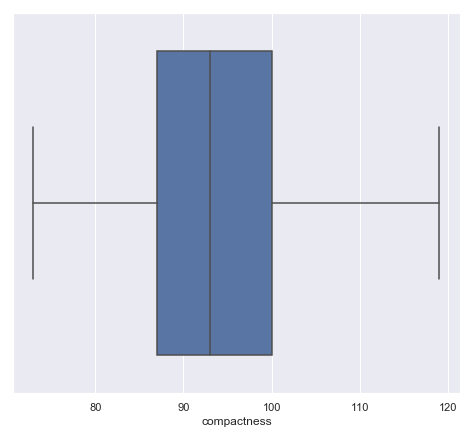

In [16]:
#for compactness column
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(imputed_vehicle_df['compactness'])

##### There is no outlier for the attribute 'compactness'

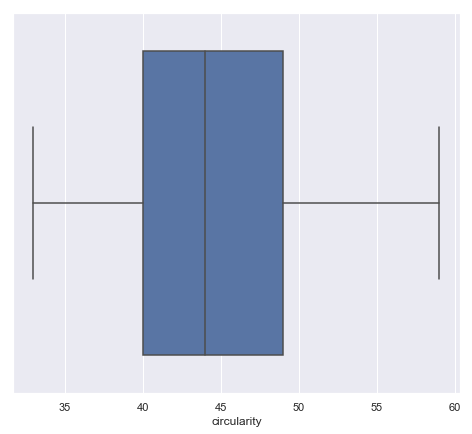

In [17]:
sns.boxplot(imputed_vehicle_df['circularity'])

##### There is no outlier for the attribute 'circularity'

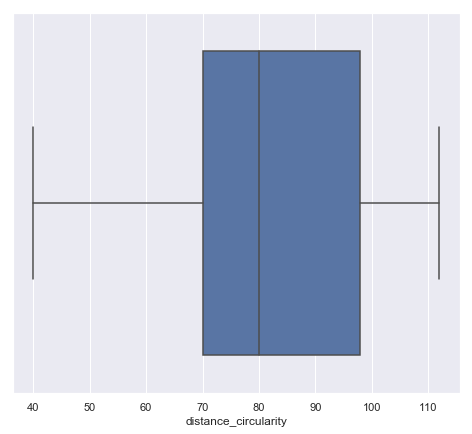

In [18]:
sns.boxplot(imputed_vehicle_df['distance_circularity'])

##### There is no outlier for the attribute 'distance_circularity'

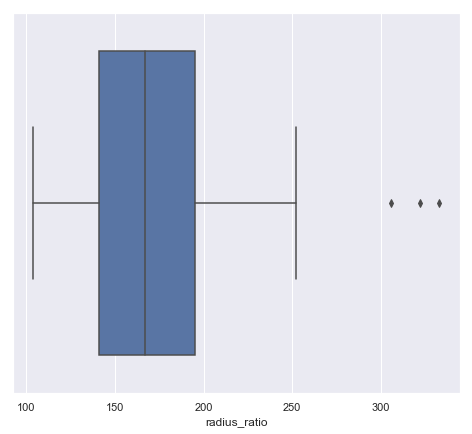

In [19]:
sns.boxplot(imputed_vehicle_df['radius_ratio'])

##### for the attribute' radius_ratio', boxplot is showing 3 outliers; they are 306,322,333. Other values range from 104 to 252.

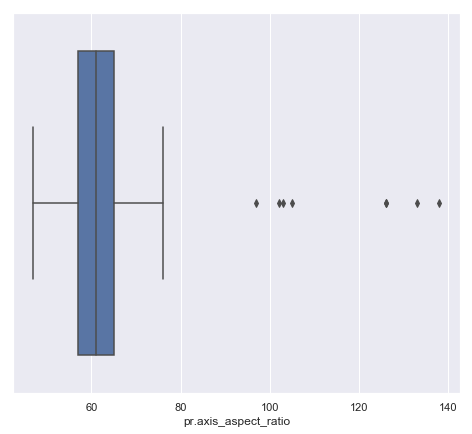

In [20]:
sns.boxplot(imputed_vehicle_df['pr.axis_aspect_ratio'])

##### For the attribute:'pr.axis_aspect_ratio', boxplot is showing 7 outlier points: 97,102,103,105,126,133,138. <br>Other values are from 47 to 76.

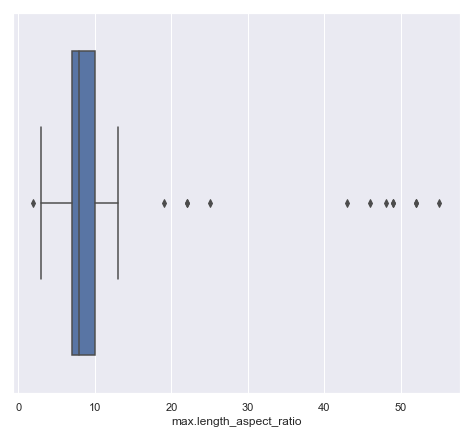

In [21]:
sns.boxplot(imputed_vehicle_df['max.length_aspect_ratio'])

##### For the attribute:'max.length_aspect_ratio' , Boxplot shows 10 outliers for this column. It is considering 2 as an outlier and datapoints from 19 and above (19,22,25,43,46,48,49,52,55). <br>This column has got values from 2 to 13 continously , after 13 we have 19.

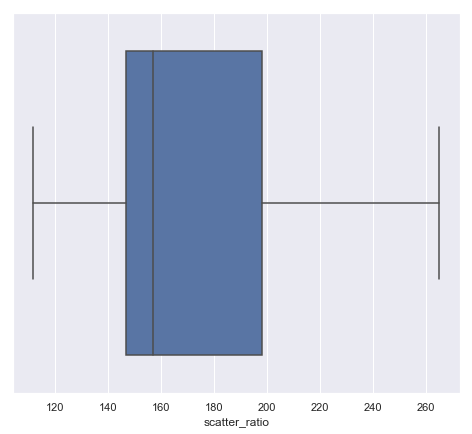

In [22]:
sns.boxplot(imputed_vehicle_df['scatter_ratio'])

##### There is no outliers for the feature 'scatter_ratio'

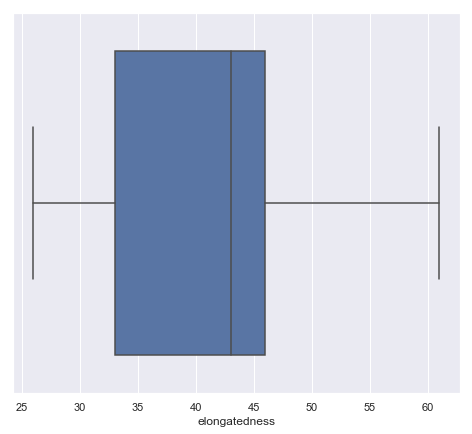

In [23]:
sns.boxplot(imputed_vehicle_df['elongatedness'])

##### There is no outlier for the feature 'elongatedness'

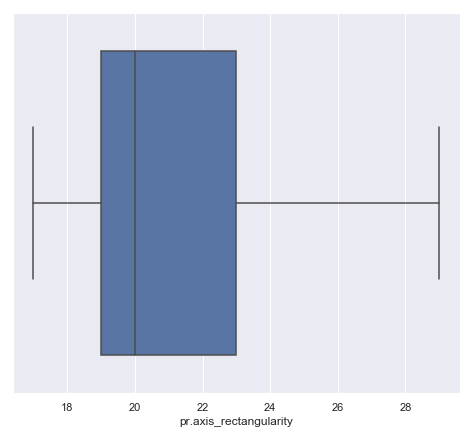

In [24]:
sns.boxplot(imputed_vehicle_df['pr.axis_rectangularity'])

##### There is no outlier for the feature 'pr.axis_rectangularity'

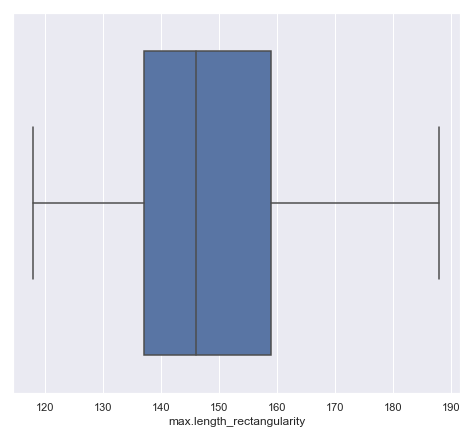

In [25]:
sns.boxplot(imputed_vehicle_df['max.length_rectangularity'])

##### There is no outlier for the feature 'max.length_rectangularity'

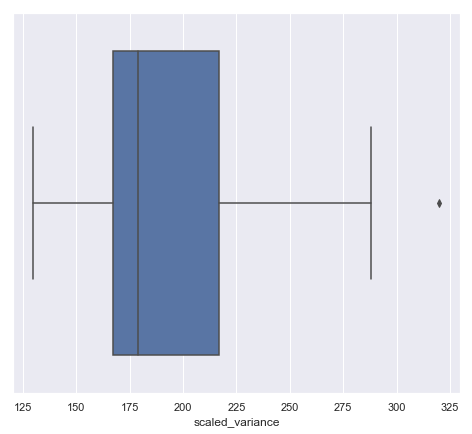

In [26]:
sns.boxplot(imputed_vehicle_df['scaled_variance'])

##### For the feature 'scaled_variance', we have one outlier (320) .

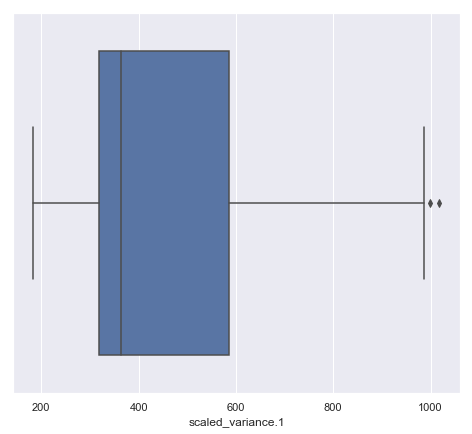

In [27]:
sns.boxplot(imputed_vehicle_df['scaled_variance.1'])

##### for the feature 'scaled_variance.1', we have two outliers:998,1018. <br> Other values for this column ranges from 184 to 987. 

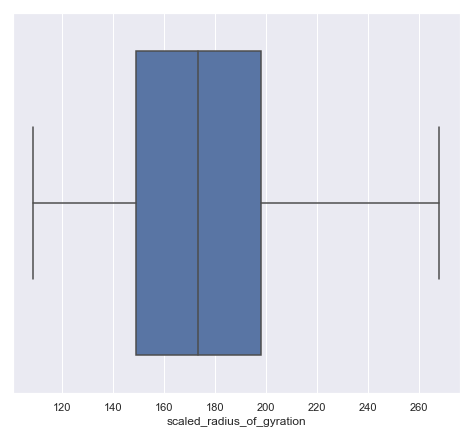

In [28]:
sns.boxplot(imputed_vehicle_df['scaled_radius_of_gyration'])

##### There is no outlier for the feature 'scaled_radius_of_gyration'

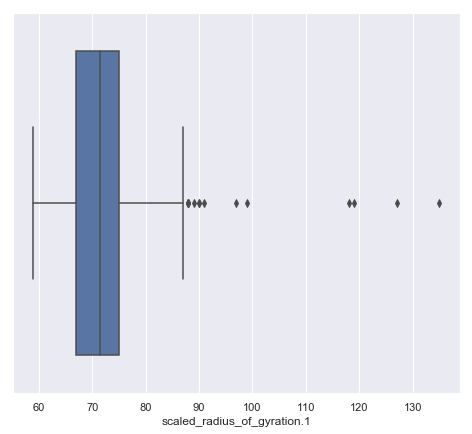

In [29]:
sns.boxplot(imputed_vehicle_df['scaled_radius_of_gyration.1'])

##### For the feature 'scaled_radius_of_gyration.1' , values are from 59 to 91 , after that we have 97,99,118,119,127,135. But as per the quartile calculations, these values are treated as outliers(including 88,89,90,91, even though they dont look like outliers). 


##### checked the dataset for the values 97,99,118,119,127,135, we could see that only one observation present for each of these values. so may be only these values can be treated as outliers.

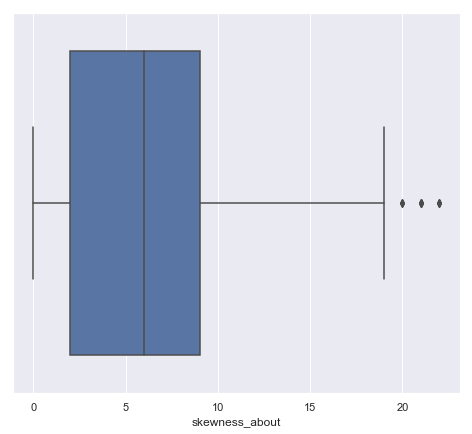

In [30]:
sns.boxplot(imputed_vehicle_df['skewness_about'])

##### The feature 'skewness_about'  has the values from 0 to 22 continously in the dataset, so the datapoints 20,21,22 need not be outliers.

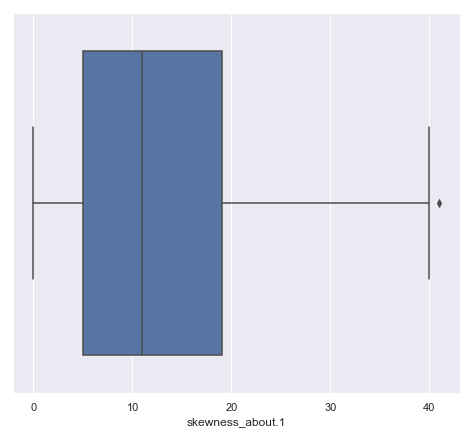

In [31]:
sns.boxplot(imputed_vehicle_df['skewness_about.1'])

##### The feature 'skewness_about.1' has the values from 0 to 41  continously . The datapoint 41 doesnt need to be an outlier.

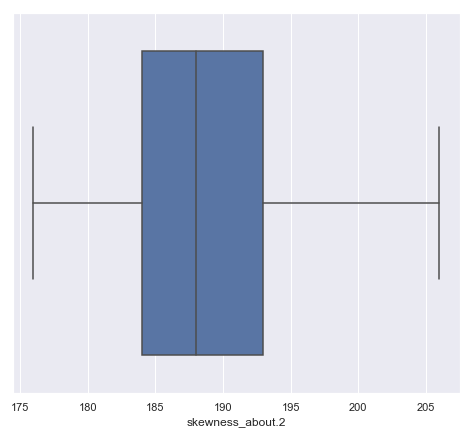

In [32]:
sns.boxplot(imputed_vehicle_df['skewness_about.2'])

##### The feature 'skewness_about.2' has no outliers

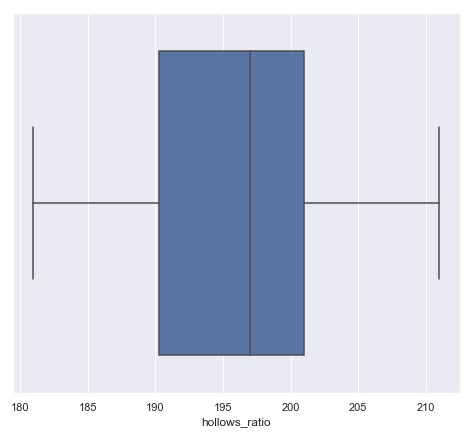

In [33]:
sns.boxplot(imputed_vehicle_df['hollows_ratio'])

##### The feautre 'hollows_ratio' has no outliers

##### we will treat outliers in the below columns only:
radius_ratio  <br>
pr.axis_aspect_ratio<br>
max.length_aspect_ratio<br>
scaled_variance<br>
scaled_variance.1<br>
scaled_radius_of_gyration.1

### Handling Outliers

Most of the outliers have single observation in the dataset. so if we are dropping the outliers, it will not impact much on the data.<br>
'radius_ratio' has 3 outliers : 306,322,333. There is only one observation for each of these values. So total 3 rows.<br>
'scaled_variance'' has only 1 oultier: 320. There is only one row for this value in the dataset.<br>
'scaled_variance.1' has 2 outliers: 998,1018; There is only one observation for each of these values. So total 2 rows.<br>

The below columns has more outliers:<br>
'pr.axis_aspect_ratio' has 7 outlier points: 97,102,103,105,126,133,138. (total 8 rows)<br>
scaled_radius_of_gyration.1 has 10 outliers : 97,99,118,119,127,135  but these 88,89,90,91 doesnt look like outliers.<br>
'max.length_aspect_ratio' has 10 outliers :  2 and (19,22,25,43,46,48,49,52,55).
for this coulmn we have values 2 to 13 contiously then we have the outliers 19,22,25,43,46,48,49,52,55 (total 12 rows)

In [34]:
#function to accept a dataframe, remove outliers using IQR, return cleaned data in a new dataframe

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [35]:
# we are removing the outliers from radius_ratio,scaled_variance,scaled_variance.1 by dropping those values.
vehicle2_df= remove_outlier(imputed_vehicle_df, 'radius_ratio')
vehicle2_df= remove_outlier(vehicle2_df, 'scaled_variance')
vehicle2_df= remove_outlier(vehicle2_df, 'scaled_variance.1')
vehicle2_df= remove_outlier(vehicle2_df, 'pr.axis_aspect_ratio')

In [36]:
vehicle2_df.shape

(836, 19)

In [37]:
#scaled_radius_of_gyration.1, we are treating outlier values greater than 91
vehicle2_df = vehicle2_df.loc[(vehicle2_df["scaled_radius_of_gyration.1"]<=91)]

In [38]:
#'max.length_aspect_ratio' has 10 outliers : 2 and (19,22,25,43,46,48,49,52,55). 
#among this, value 2 doesnt look like an outlier, becuase this column has values 2 to 13 contiously
vehicle2_df =  vehicle2_df.loc[(vehicle2_df['max.length_aspect_ratio'] <=13)]

In [39]:
vehicle2_df.shape

(832, 19)

##### Let's check the columns which had concerned outliers before.

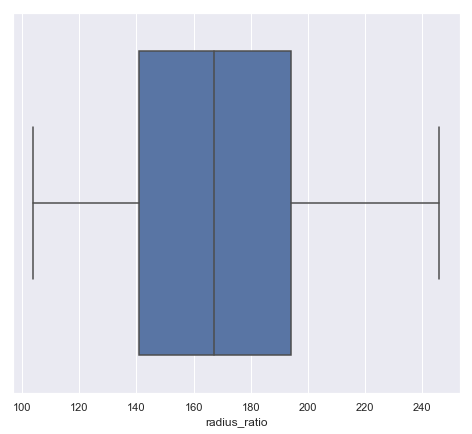

In [40]:
sns.boxplot(vehicle2_df['radius_ratio'])

No more outliers present

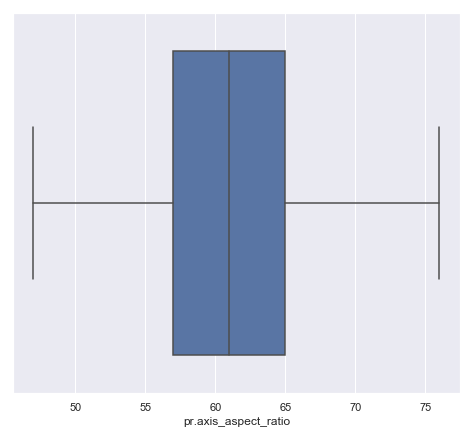

In [41]:
sns.boxplot(vehicle2_df['pr.axis_aspect_ratio'])

No more outliers present

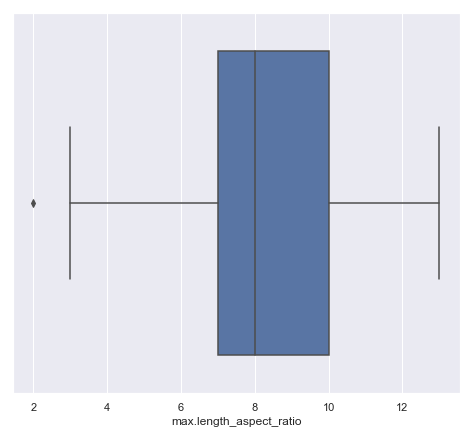

In [42]:
sns.boxplot(vehicle2_df['max.length_aspect_ratio'])

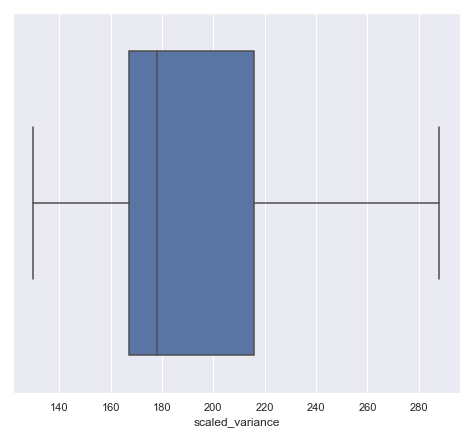

In [43]:
sns.boxplot(vehicle2_df['scaled_variance'])

No more outliers present

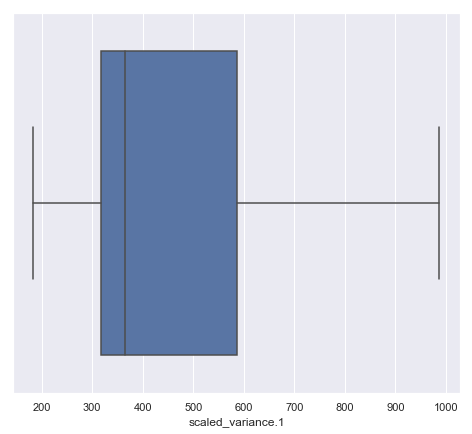

In [44]:
sns.boxplot(vehicle2_df['scaled_variance.1'])

No more outliers present

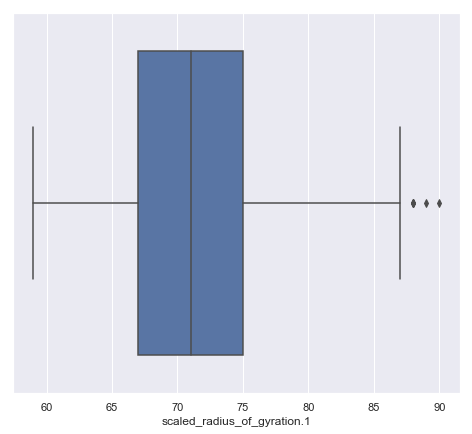

In [45]:
sns.boxplot(vehicle2_df['scaled_radius_of_gyration.1'])

Only the datapoints 88,89,90 are present as outliers which is as expected.<br>
##### Now we have removed all the outliers which were looking unrealisitic.

### Correlation matrix 

In [46]:
corr = vehicle2_df.corr()

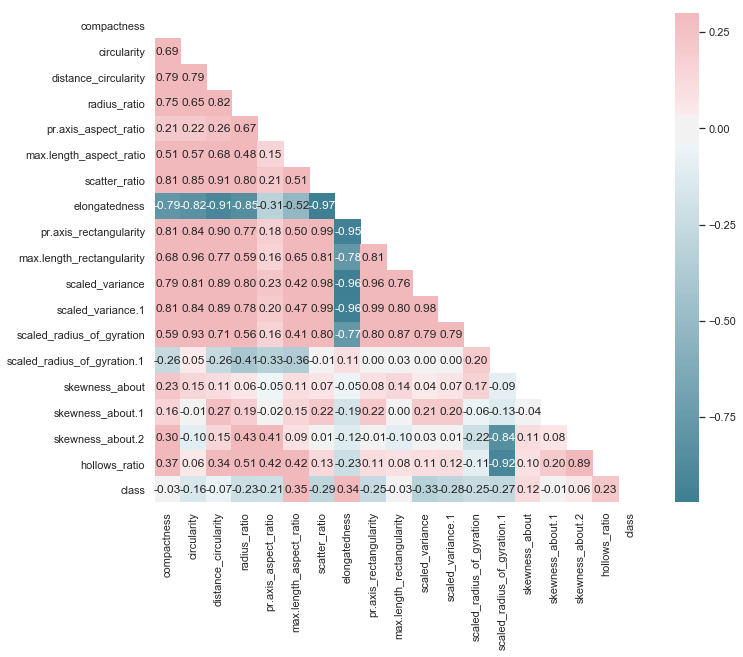

In [47]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True,fmt='.2f')

#sns.heatmap(corr_mat,annot=True, fmt='.2f')


correlation between most of the variables are very high.

In [48]:
#Identify Highly Correlated Features

# Create correlation matrix with absolute values
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#### Choosing attributes for the model analysis

In [49]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [50]:
to_drop

['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1']

In [51]:
#creating new vehicle3_df by dropping features which have high correlation with other columns
vehicle3_df = vehicle2_df.drop(vehicle2_df[to_drop], axis=1)

In [52]:
vehicle3_df.shape

(832, 14)

In [53]:
vehicle3_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio', 'class'],
      dtype='object')

## Standardize the data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one. Standardization of data is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features are not standardized(since the unit/scale canbe different for each attribute).

#### standardize the data in  vehicle3_df (data which is treated for missing values,outliers and  high correlated features)

In [54]:
#separating features and label
X=vehicle3_df.iloc[:, :-1]
y=vehicle3_df.iloc[:,-1]
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
5        107.0         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
5                  50.0                      6.0          255.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
5                      264.0                         85.0             5.0   

   skewness_about.1  skewness_about.2  hollows_ratio  
0              16.0             187.0          197.0  
1              14.0             189.0          199.0  
2               9.0             188.0          196.0  
3              10.0             199.0          207.0  
5               9.0             181.0          183.0

In [55]:
# Scale the data to be between -1 and 1

sc = StandardScaler()
veh_std =  sc.fit_transform(X)

In [56]:
veh_std.shape

(832, 13)

## Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 

### Running SVM :Parameter estimation using grid search with cross-validation 

In [57]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'C': [0.01,0.05,0.5,1]},
                    {'kernel': ['linear'], 'C': [0.01,0.05,0.5,1]}
                   ]

In [58]:
svc = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')

### Running Without PCA  on the scaled data with all the attributes selected for model analysis

#### Splitting dataset into training set and testing set 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(veh_std, y, test_size=0.3, random_state=1)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((582, 13), (250, 13), (582,), (250,))

#### Fitting SVM into scaled dataset

In [61]:
svc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.01, 0.05, 0.5, 1]}, {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
print('Best parameters set found on development set:', svc.best_params_)
print('This model produces a mean cross-validated score (accuracy) of', svc.best_score_)

Best parameters set found on development set: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (accuracy) of 0.9415807560137457


In [63]:
y_true, y_pred = y_test, svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print("Detailed classification report:")
print(classification_report(y_true, y_pred))

Accuracy Score: 0.96
Detailed classification report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        61
         1.0       0.96      0.98      0.97       128
         2.0       0.98      0.87      0.92        61

   micro avg       0.96      0.96      0.96       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.96      0.96       250



#### Confusion matrix

In [64]:
confusion_matrix(y_test, y_pred)

array([[ 61,   0,   0],
       [  1, 126,   1],
       [  3,   5,  53]], dtype=int64)

Basically, confusion matrix says how much examples were classified into classes.The main diagonal shows the examples that were classify correctly.<br>
 first row , out of 61, model has predicted 61 correctly <br>
 second row, out of 128, model has predicted 126 correctly<br>
 third row, out of 61, model has predicted 53 correctly.

### Test the SVM model on the vehicle2_df (data which is only treated for missing values,outliers) 
#### from this data,highly correlated features are not removed

#### standardize the data in vehicle2_df 

In [65]:
X=vehicle2_df.iloc[:, :-1]
y=vehicle2_df.iloc[:,-1]

In [66]:
sc = StandardScaler()
veh_std2 =  sc.fit_transform(X)
veh_std2.shape

(832, 18)

### Running SVM :Parameter estimation using grid search with cross-validation

In [67]:
svc = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
X_train, X_test, y_train, y_test = train_test_split(veh_std2, y, test_size=0.3, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
svc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.01, 0.05, 0.5, 1]}, {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
print('Best parameters set found on development set:', svc.best_params_)
print('This model produces a mean cross-validated score (accuracy) of', svc.best_score_)

Best parameters set found on development set: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (accuracy) of 0.9570446735395189


In [69]:
y_true, y_pred = y_test, svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_pred,y_test))
print("Detailed classification report:")
print(classification_report(y_true, y_pred))

Accuracy Score: 0.964
Detailed classification report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        61
         1.0       0.97      0.98      0.97       128
         2.0       0.96      0.90      0.93        61

   micro avg       0.96      0.96      0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



#### confusion_matrix

In [70]:
confusion_matrix(y_test, y_pred)

array([[ 61,   0,   0],
       [  1, 125,   2],
       [  2,   4,  55]], dtype=int64)

##### When we run the SVM model without PCA on the vehicle3_df , we get the Accuracy Score: 0.96 and  model produces a mean cross-validated score (accuracy) of 0.94
##### When we run the SVM model without PCA on the vehicle2_df , we get the Accuracy Score: 0.964 and  model produces a mean cross-validated score (accuracy) 0.96

#### When we are running the SVM model on the data where we didn't remove the highly correlated features, is producing a slightly higher accuracy. So lets do the PCA on that data.

## Use PCA  and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 

In [71]:
pca = PCA().fit(veh_std2)

In [72]:
#Eigen values
print(pca.explained_variance_)

[9.86512640e+00 3.35533687e+00 1.20534055e+00 1.14080307e+00
 8.73993408e-01 6.45290362e-01 3.15928332e-01 2.22683767e-01
 1.11117090e-01 7.57151117e-02 6.02990920e-02 4.44892617e-02
 2.97049057e-02 2.68014865e-02 1.88866583e-02 1.72016261e-02
 9.92771010e-03 3.01495077e-03]


In [73]:
#Eigen vectors
print(pca.components_)

[[ 2.71832641e-01  2.84754678e-01  3.01056562e-01  2.74257676e-01
   1.03451112e-01  1.97949734e-01  3.09003653e-01 -3.07309284e-01
   3.05937794e-01  2.75841575e-01  3.01273920e-01  3.05404349e-01
   2.60579631e-01 -5.16995945e-02  4.15230711e-02  5.94041183e-02
   4.19141636e-02  8.97344701e-02]
 [-8.42815650e-02  1.34318709e-01 -4.17945876e-02 -1.95165828e-01
  -2.52732030e-01 -1.02980248e-01  7.85595227e-02 -1.74829910e-02
   9.03922585e-02  1.25794507e-01  7.74493893e-02  8.50280918e-02
   2.12890395e-01  5.04179794e-01 -3.72708273e-02 -9.19819804e-02
  -5.01932987e-01 -5.05503353e-01]
 [ 5.87865949e-02  2.01073602e-01 -5.56062087e-02 -8.88251630e-02
  -1.23986075e-02  1.86734958e-01 -1.10664668e-01  1.04480220e-01
  -1.04161315e-01  2.22554861e-01 -1.52893047e-01 -1.12925607e-01
   1.97060949e-01 -8.29407826e-02  5.94653706e-01 -6.21834178e-01
   4.85448722e-02  4.55722918e-02]
 [ 1.26753026e-01 -5.79832689e-02  1.13176561e-01 -2.37398787e-01
  -6.16200057e-01  2.77306277e-01  1.

In [74]:
# percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.47403849e-01 1.86183556e-01 6.68828791e-02 6.33017728e-02
 4.84968297e-02 3.58063763e-02 1.75304784e-02 1.23564510e-02
 6.16575196e-03 4.20133933e-03 3.34592318e-03 2.46865495e-03
 1.64828904e-03 1.48718184e-03 1.04799767e-03 9.54497284e-04
 5.50876542e-04 1.67295946e-04]


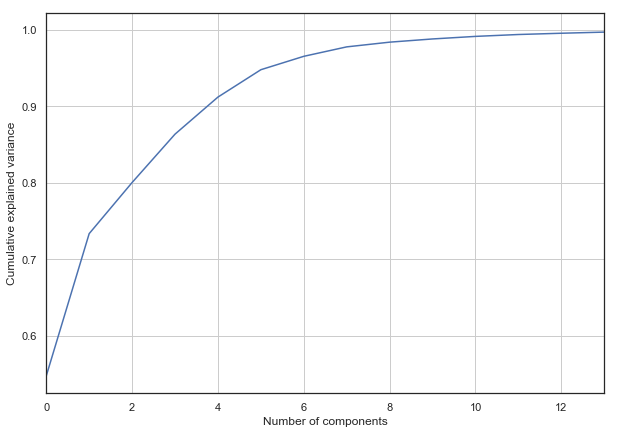

In [75]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

The above plot shows almost 95% variance by the first 6 components. Therfore we can drop the rest of the components.

In [76]:

pca_rd = PCA(n_components=6)

veh_pca = pca_rd.fit_transform(veh_std2)

print(veh_pca)

[[ 5.95417036e-01 -6.48972538e-01  3.52140400e-01 -8.04972180e-01
  -8.34932572e-01 -1.84816880e+00]
 [-1.51335623e+00 -3.74690554e-01  4.24096475e-01  1.17671245e+00
  -3.56618604e-01 -7.17174241e-02]
 [ 3.92182479e+00  2.63884719e-01  1.14097851e+00 -8.03785666e-02
   8.45476653e-01 -6.28509573e-01]
 ...
 [ 5.12982145e+00 -7.86795088e-02  3.90741509e-01 -1.03440331e+00
  -1.30153910e+00  2.05309410e-01]
 [-3.28840187e+00 -1.10182305e+00 -1.82181503e+00  6.53071417e-01
  -5.26359106e-01  7.65114603e-05]
 [-4.98004811e+00  3.75787815e-01 -1.20193737e+00  4.43089795e-01
  -1.75315171e-01  3.43540392e-01]]


In [77]:
veh_pca.shape

(832, 6)

### Relationship between the 6 features 

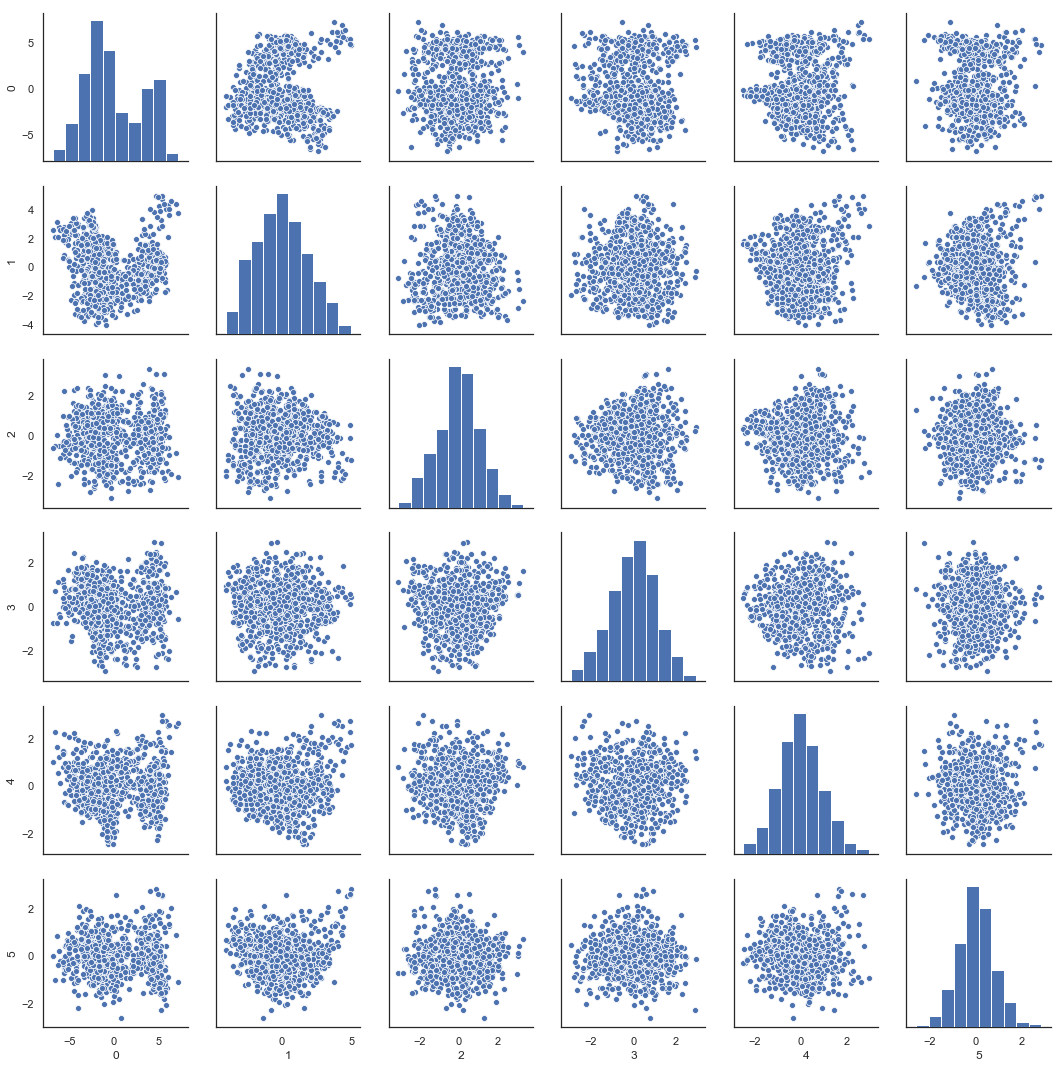

In [78]:
sns.pairplot(pd.DataFrame(veh_pca))

as we can see, no correlation among the data.

### Running SVM with PCA

#### Splitting PCA data into training set and testing set

In [79]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(veh_pca, y, test_size=0.3, random_state=1)

In [80]:
X_train_pca.shape,X_test_pca.shape,y_train_pca.shape,y_test_pca.shape

((582, 6), (250, 6), (582,), (250,))

#### Fitting SVM into PCA dataset

In [81]:
svc.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.01, 0.05, 0.5, 1]}, {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
print('Best parameters set found on development set:', svc.best_params_)
print('This model produces a mean cross-validated score (accuracy) of', svc.best_score_)

Best parameters set found on development set: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (accuracy) of 0.9089347079037801


In [83]:
y_pca_true, y_pca_pred = y_test_pca, svc.predict(X_test_pca)
print('Accuracy Score:',accuracy_score(y_pca_pred,y_pca_true))

print("Detailed classification report: SVM running with PCA")
print(classification_report(y_pca_true, y_pca_pred))

Accuracy Score: 0.92
Detailed classification report: SVM running with PCA
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        61
         1.0       0.94      0.91      0.93       128
         2.0       0.90      0.85      0.87        61

   micro avg       0.92      0.92      0.92       250
   macro avg       0.91      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [84]:
confusion_matrix(y_pca_true, y_pca_pred)

array([[ 61,   0,   0],
       [  5, 117,   6],
       [  2,   7,  52]], dtype=int64)

Basically, confusion matrix says how much examples were classified into classes.The main diagonal shows the examples that were classify correctly.<br>
 first row , out of 61, model has predicted 61 correctly <br>
 second row, out of 128, model has predicted 117 correctly<br>
 third row, out of 61, model has predicted 52 correctly.

## Conclusion

Principal Component Analysis is a dimensionality-reduction method that is often used to reduce the dimensionality of large datasets, by transforming a large set of variables into smaller one that still contains most of the information in the large set.The algorithm actually constructs new set of properties based on combination of the old ones.<br><br>

As per the above SVM model analysis with and without PCA, we can see that :<br>
without PCA, when we run the model with 13 independent attributes, we get the Mean cross-validated score of the best_estimator = 0.957 and accuracy_score = 0.964 <br>
when we run the svm with PCA, then we get the Mean cross-validated score of the best_estimator =0.91 and accuracy_score = 0.92 <br>
Looks like by reducing dimensionality from 13 to 6, we only dropped around 4% in the score.<br>

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. <br>

Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.
